In [6]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


Groups identified:

Control group --> control (old_page)

Test group --> treatment (new_page)

Null Hypothesis (H₀):
Conversion rate of new page = conversion rate of old page

Alternative Hypothesis (H₁):
Conversion rate of new page ≠ conversion rate of old page

Significance level (α): 0.05

In [8]:
summary = df.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
summary

,count,sum,mean
group,,,
control,147202,17723,0.120399
treatment,147278,17514,0.118918


At first glance, the new page converts slightly worse.

Chi-Square Test of Independence
(best for comparing conversion rates)

In [9]:
contingency = pd.crosstab(df['group'], df['converted'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

p_value

np.float64(0.2177243320179413)

p-value = 0.2177

α = 0.05

p > α → Fail to reject H₀

No statistically significant difference between control and treatment.

In [10]:
p_control = summary.loc['control', 'mean']
p_treatment = summary.loc['treatment', 'mean']
n_control = summary.loc['control', 'count']
n_treatment = summary.loc['treatment', 'count']

diff = p_treatment - p_control
se = np.sqrt(
    p_control*(1-p_control)/n_control +
    p_treatment*(1-p_treatment)/n_treatment
)

ci_lower = diff - 1.96*se
ci_upper = diff + 1.96*se

diff, (ci_lower, ci_upper)

(np.float64(-0.001481214693513519),
 (np.float64(-0.003825739466954251), np.float64(0.0008633100799272132)))

Difference (Treatment − Control): -0.00148

CI: [-0.00383 , 0.00086]

Interval includes 0, confirming no significant effect.

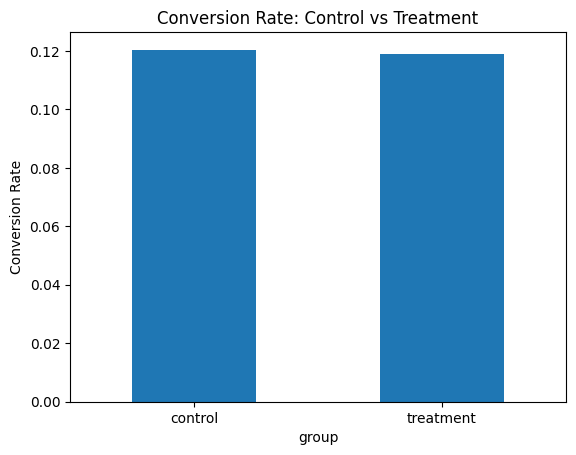

In [11]:
summary['mean'].plot(kind='bar')
plt.title("Conversion Rate: Control vs Treatment")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=0)
plt.show()

Visualization shows very similar conversion rates, with control slightly higher.